Project: Student Result Analysis Using K-means and Fuzzy C-means

dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Algorithms: KMeans, Fuzzy C-Means

Inspiration: To understand the influence of the parents background, test preparation, etc on students performance

Main Steps:
1. Data preprocessing
2. Outlier Detection
3. Basic Analysis
4. Apply KMeans and visualize results
5. Apply Fuzzy C-means and visualize results
6. Performance Evaluation
7. Conclusion, represent knowledge

In [382]:
import seaborn as sns  # Visualize data
import matplotlib.pyplot as plt
import os
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Preprocessing, 
from sklearn.cluster import KMeans
import plotly.express as px
import random
import operator
import math

In [383]:
# Read student data from csv file
df = pd.read_csv('StudentsPerformance.csv')

In [384]:
# Check data by displaying data head 
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [385]:
# Check data by displaying data tail 
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


Data is read perfectly!!! Start data pre-processing!

In [386]:
# Generate descriptive statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [387]:
# Check data type of cols
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [388]:
# Check if data has missing values
df.isna().sum()
# No missing values
# if there are, run this to delete all rows that contain empty cells

#df = df.dropna(inplace=True)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [389]:
# Check duplicated rows
df.duplicated().sum()

# No duplicated rows

0

We should rename all attributes as they are long

In [390]:
# Rename cols
df.rename(columns={"race/ethnicity": "race", 
                  "parental level of education": "parent_education",
                  "math score": "math", 
                  "reading score": "reading", 
                  "writing score": "writing", 
                  "test preparation course": "test_preparation"}
                  , inplace=True)
# Show dataframe after renaming
df.head(10)


,gender,race,parent_education,lunch,test_preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Check whether this dataset has outliers.
Clustering algorithms are very sensitive with outliers.
We use Std deviation to detect outliers.
We define a function named outlier_dectection.

In [391]:
# Define an outlier check function
def outlier_dectection (df, column):
   data_mean, data_std = df[column].mean(), df[column].std()
   cut_off = data_std * 3
   lower, upper = data_mean - cut_off, data_mean + cut_off
   print('The lower bound value is', lower)
   print('The upper bound value is', upper)
   df1 = df[df[column] > upper]
   df2 = df[df[column] < lower]
   print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
   plt.figure(figsize = (10,5))
   sns.histplot(df[column], kde=False)
   plt.axvspan(xmin = lower,xmax= df[column].min(),alpha=0.2, color='red')
   plt.axvspan(xmin = upper,xmax= df[column].max(),alpha=0.2, color='red')
   return lower, upper

The lower bound value is 20.59975971197165
The upper bound value is 111.57824028802835
Total number of outliers are 4


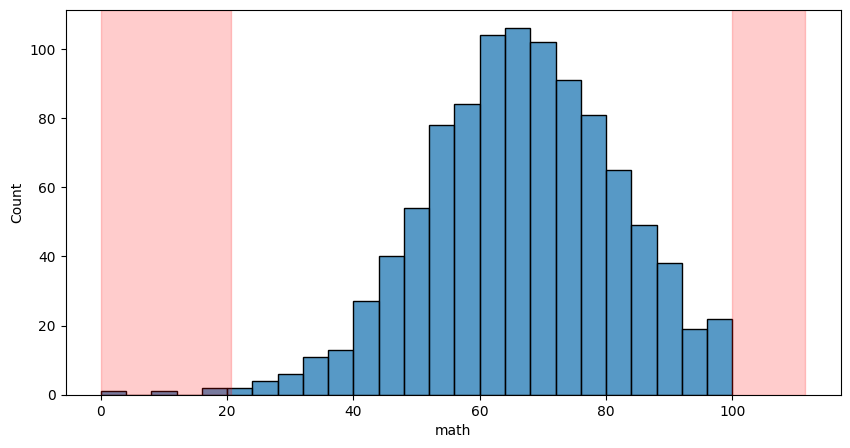

In [392]:
# Check outliers in math col
lower, upper = outlier_dectection(df, 'math')

# Remove outliers
df = df[(df['math'] < upper) & (df['math'] > lower)]

The lower bound value is 26.189102205790704
The upper bound value is 112.48158052513298
Total number of outliers are 3


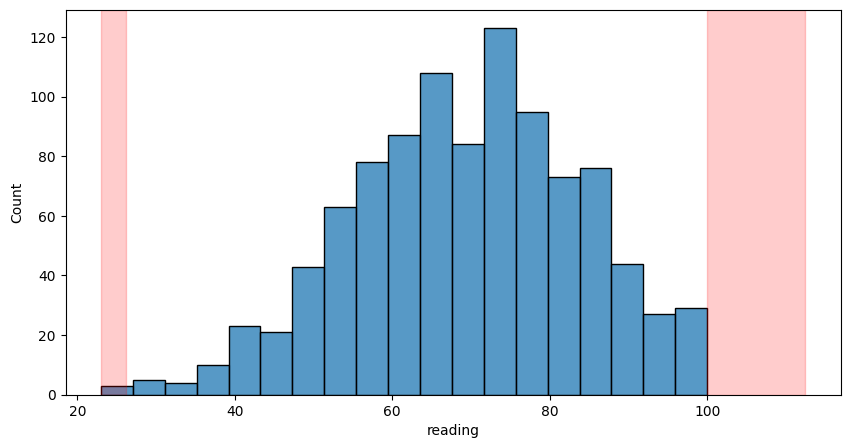

In [393]:
# Check outliers in reading col
lower, upper = outlier_dectection(df, 'reading')

# Remove outliers
df = df[(df['reading'] < upper) & (df['reading'] > lower)]

The lower bound value is 24.225961923417813
The upper bound value is 112.54140967779064
Total number of outliers are 0


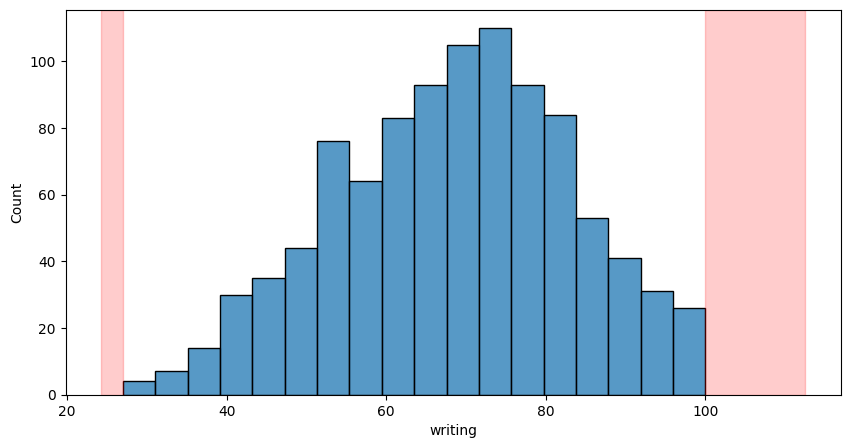

In [394]:
# Check outliers in writing col
lower, upper = outlier_dectection(df, 'writing')

# Remove outliers
df = df[(df['writing'] < upper) & (df['writing'] > lower)]

After removing all outliers, there are 993 rows left

In [395]:
df.describe()

,math,reading,writing
count,993.000000,993.000000,993.000000
mean,66.420947,69.471299,68.383686
std,14.661917,14.188799,14.719241
min,22.000000,28.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


Now, copy this final data into 3 dataset: for data understanding, for k-means clutering and for FCM clustering.

In [396]:
#Data use for basic researching
research_df = df.copy()

#Data use for clustering
kmeans_df = df.copy()
fcm_df = df.copy()

#Data Understanding

In [397]:
# Add a average score column
research_df['final score'] = research_df[['math', 'reading', 'writing']].mean(axis=1)
research_df.head(20)

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,final score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


Looking at these records we can say that: a student's scores in all 3 subjects are not very different.

Now try to group and analyze by some attributes

First is gender

[64.04085603 68.97494781]
[72.95719844 65.73068894]
[72.85019455 63.5908142 ]


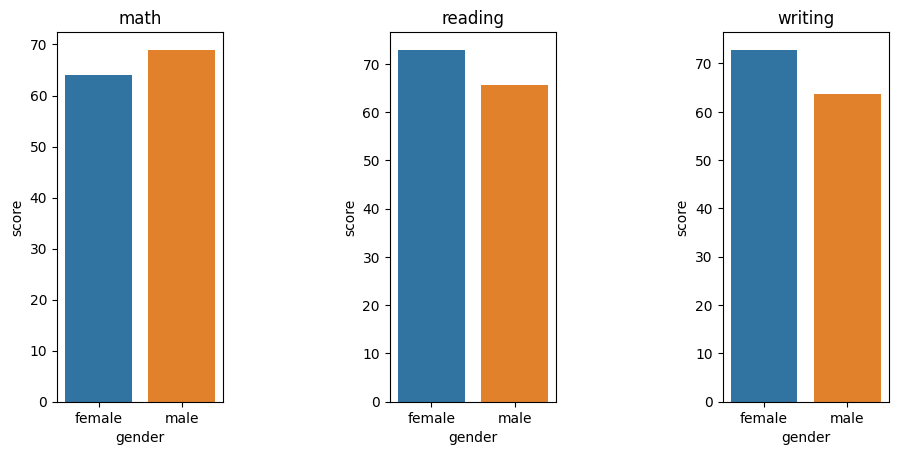

In [398]:
#Showing scores base on gender
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    gender_df = research_df.groupby('gender')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=gender_df.index, y=gender_df.loc[:,"mean"].values)
    print(gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(research_df.columns[-4:-1])[i])

Now is race/ethnicity

[72.85019455 63.5908142 ]
[72.85019455 63.5908142 ]
[72.85019455 63.5908142 ]


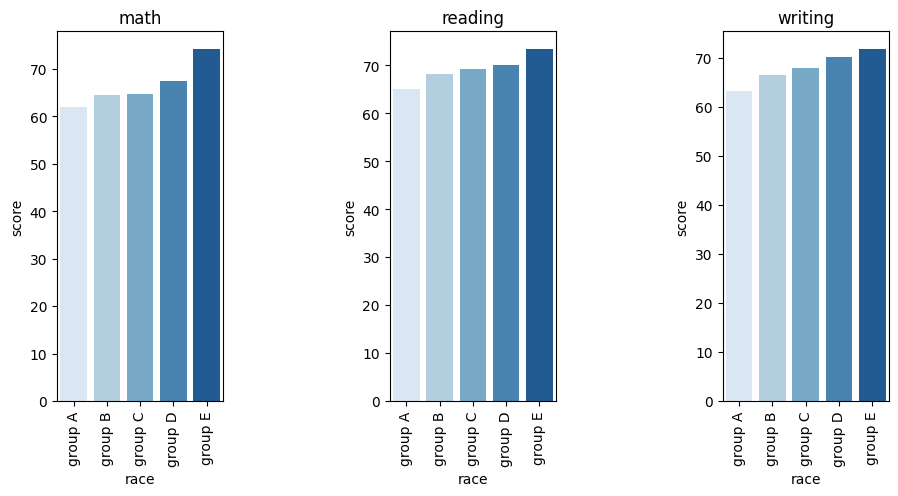

In [399]:
#Showing scores base on race
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    race_df = research_df.groupby('race')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=race_df.index, y=race_df.loc[:,"mean"].values, palette='Blues')
    print(gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.xticks(rotation = 90)
    plt.title(list(research_df.columns[-4:-1])[i])

Now is the test preparing

[72.85019455 63.5908142 ]
[72.85019455 63.5908142 ]
[72.85019455 63.5908142 ]


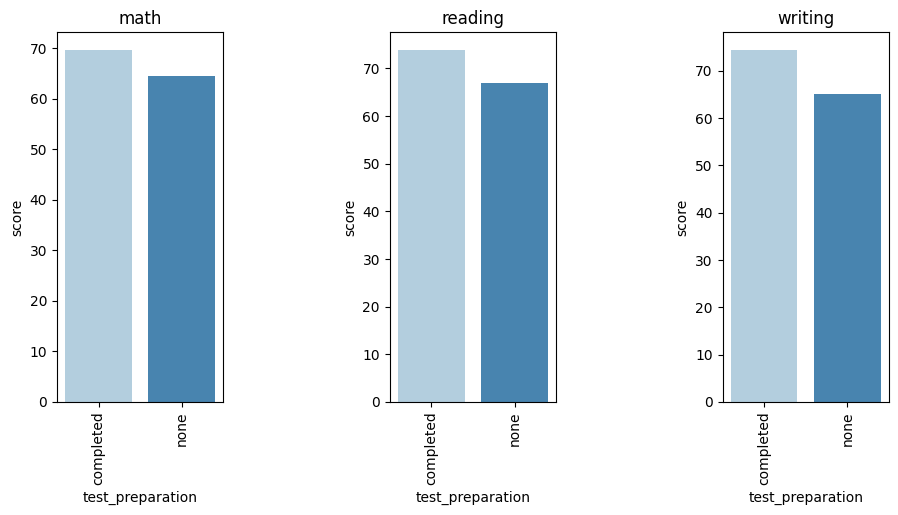

In [400]:
#Showing scores base on the test preparaion
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    test_df = research_df.groupby('test_preparation')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=test_df.index, y=test_df.loc[:,"mean"].values, palette='Blues')
    print(gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.xticks(rotation = 90)
    plt.title(list(research_df.columns[-4:-1])[i])

Or we could use box plot

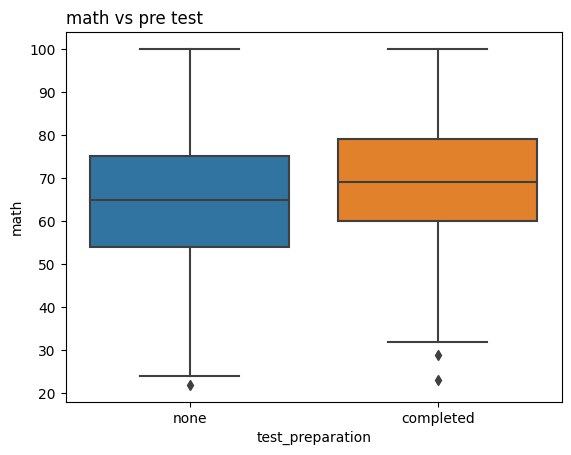

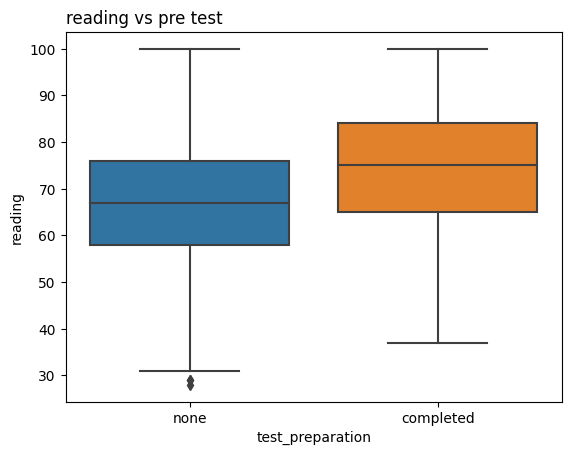

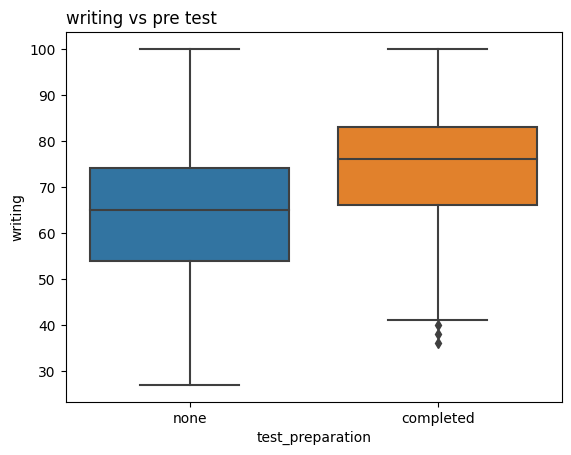

In [401]:
#Showing scores base on preparation before exams
for item in research_df.columns[-4:-1]:
    sns.boxplot(x=research_df["test_preparation"], y=research_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

Do that again with the lunch property

[59.52285714 70.17573872]
[65.23428571 71.77760498]
[63.65142857 70.95956454]


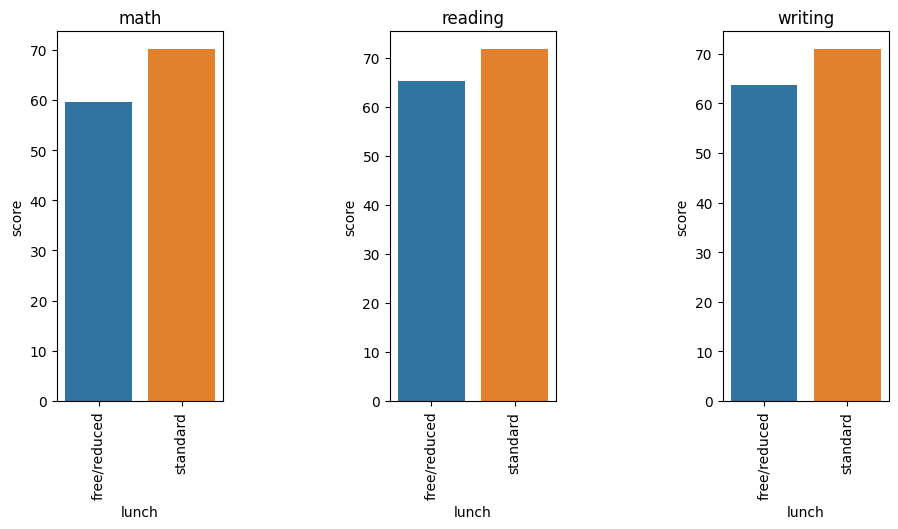

In [402]:
#Showing scores based on lunch
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    lunch_df = research_df.groupby('lunch')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=lunch_df.index, y=lunch_df.loc[:,"mean"].values)
    print(lunch_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.xticks(rotation = 90)
    plt.title(list(research_df.columns[-4:-1])[i])

Lastly, parents' education level

[67.88288288 69.38983051 62.58247423 69.74576271 67.51785714 64.30681818]
[70.92792793 73.         65.12371134 75.37288136 69.80803571 67.65340909]
[69.8963964  73.38135593 62.89690722 75.6779661  69.22767857 65.65340909]


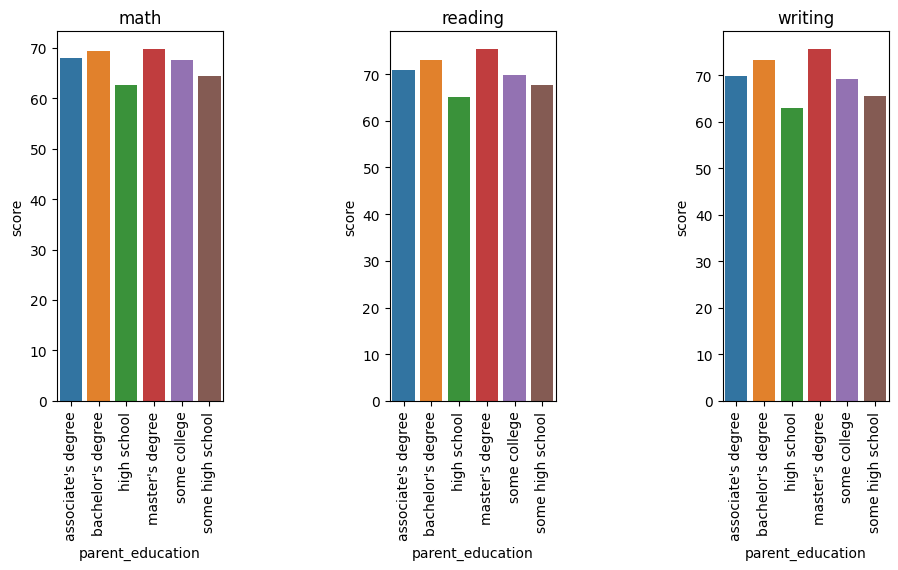

In [403]:
#Showing scores based on PEL
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3,i+1)
    lunch_df = research_df.groupby('parent_education')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=lunch_df.index, y=lunch_df.loc[:,"mean"].values)
    print(lunch_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.xticks(rotation = 90)
    plt.title(list(research_df.columns[-4:-1])[i])

Do it in another way: final score

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

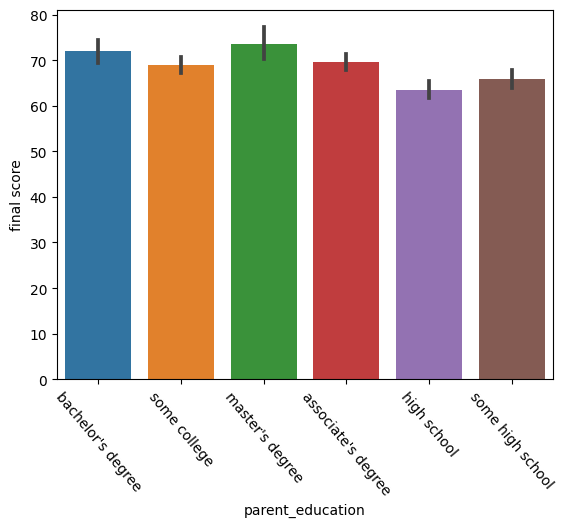

In [404]:
plt.figure()
sns.barplot(data=research_df, x='parent_education', y='final score')
plt.xticks(rotation=-50)

After that, we will try to encode nominal columns using LabelEncoder.

In [405]:
#Encode nominal columns
columns_encode = ['gender','race','parent_education','lunch','test_preparation']
for column in columns_encode: 
    encoder = LabelEncoder() 
    kmeans_df[column] = encoder.fit_transform(kmeans_df[column])
    print(encoder.classes_)
    print(np.sort(kmeans_df[column].unique()))

['female' 'male']
[0 1]
['group A' 'group B' 'group C' 'group D' 'group E']
[0 1 2 3 4]
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
[0 1 2 3 4 5]
['free/reduced' 'standard']
[0 1]
['completed' 'none']
[0 1]


Copy new dataset for FCM dataset

In [406]:
fcm_df = kmeans_df.copy()


In [407]:
fcm_df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


After encoding, we could use these fields to calculate the correlation among columns

<Axes: >

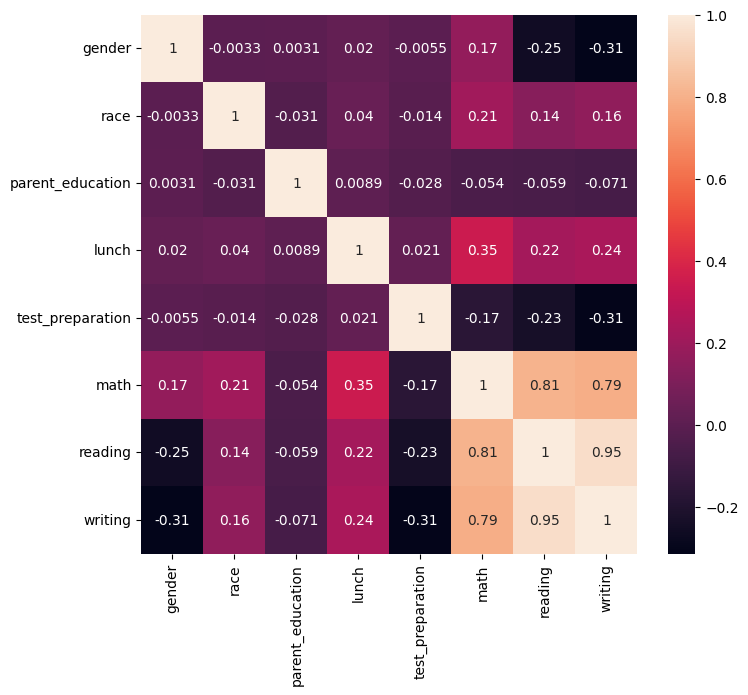

In [408]:
#Correlations among columns
correlations = kmeans_df.corr()
fig = plt.figure(figsize=(8,7))
sns.heatmap(data=correlations, annot=True)

##Finish data understanding